In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('fifa21_training.csv')

In [3]:
#Dropping columns
data = data.drop(columns= ['Unnamed: 0','ID', 'Name', 'Team & Contract', 'Loan Date End'])

In [4]:
#Aligned naming convention -> lower and replace blanks
data.columns=[e.lower().replace(' ', '_') for e in data.columns]   
data.columns

Index(['age', 'nationality', 'club', 'bp', 'position', 'height', 'weight',
       'foot', 'growth', 'joined', 'value', 'wage', 'release_clause',
       'contract', 'attacking', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'skill', 'dribbling', 'curve',
       'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',

In [5]:
data.head()

,age,nationality,club,bp,position,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,"5'9""",161lbs,Right,1,"Jul 1, 2015",€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"6'0""",159lbs,Right,0,"Jan 16, 2015",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,33,Italy,Al Hilal,CAM,CAM CF,"5'4""",134lbs,Right,0,"Jan 31, 2019",€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,22,Wales,Swansea City,CDM,CDM CM,"5'10""",152lbs,Right,13,"Jul 1, 2016",€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,23,France,US Orléans Loiret Football,CDM,CDM CM,"5'11""",150lbs,Right,8,"Jul 1, 2018",€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [6]:
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,age,0.00
1,nationality,0.00
2,club,0.15
3,bp,0.00
4,position,2.50
...,...,...
92,cb,0.00
93,rcb,0.00
94,rb,0.00
95,gk,0.00


In [7]:
data_temp = data.reset_index(drop=True)

data_temp = data_temp[['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',]][:]

In [8]:
data_temp.head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1
1,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2
2,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2
3,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2
4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2


In [33]:
def split_add(x):
    split_list = x.split('+')
    return int(split_list[0]) + int(split_list[1])

In [42]:
data_temp['ls'].apply(split_add)

0        59
1        77
2        75
3        52
4        58
         ..
13695    46
13696    24
13697    69
13698    57
13699    59
Name: ls, Length: 13700, dtype: int64

In [43]:
for col in data_temp.columns:
    data_temp[col] = data_temp[col].apply(split_add)

In [44]:
data_temp.head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16
1,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20
2,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14
3,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16
4,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17


In [39]:
column = data_temp.columns
column

Index(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk'],
      dtype='object')

In [45]:
numericals = data_temp.select_dtypes(include=np.number)

In [46]:
numericals.corr

<bound method DataFrame.corr of        ls  st  rs  lw  lf  cf  rf  rw  lam  cam  ram  lm  lcm  cm  rcm  rm  \
0      59  59  59  61  62  62  62  61   64   64   64  64   64  64   64  64   
1      77  77  77  77  77  77  77  77   77   77   77  77   70  70   70  77   
2      75  75  75  80  79  79  79  80   80   80   80  80   76  76   76  80   
3      52  52  52  51  51  51  51  51   55   55   55  55   58  58   58  55   
4      58  58  58  59  59  59  59  59   63   63   63  64   65  65   65  64   
...    ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ..  ...  ..  ...  ..   
13695  46  46  46  51  48  48  48  51   50   50   50  55   50  50   50  55   
13696  24  24  24  20  22  22  22  20   25   25   25  24   26  26   26  24   
13697  69  69  69  74  73  73  73  74   76   76   76  76   76  76   76  76   
13698  57  57  57  56  55  55  55  56   59   59   59  59   61  61   61  59   
13699  59  59  59  59  59  59  59  59   63   63   63  62   62  62   62  62   

       lwb  ldm  cdm  rdm  rwb 

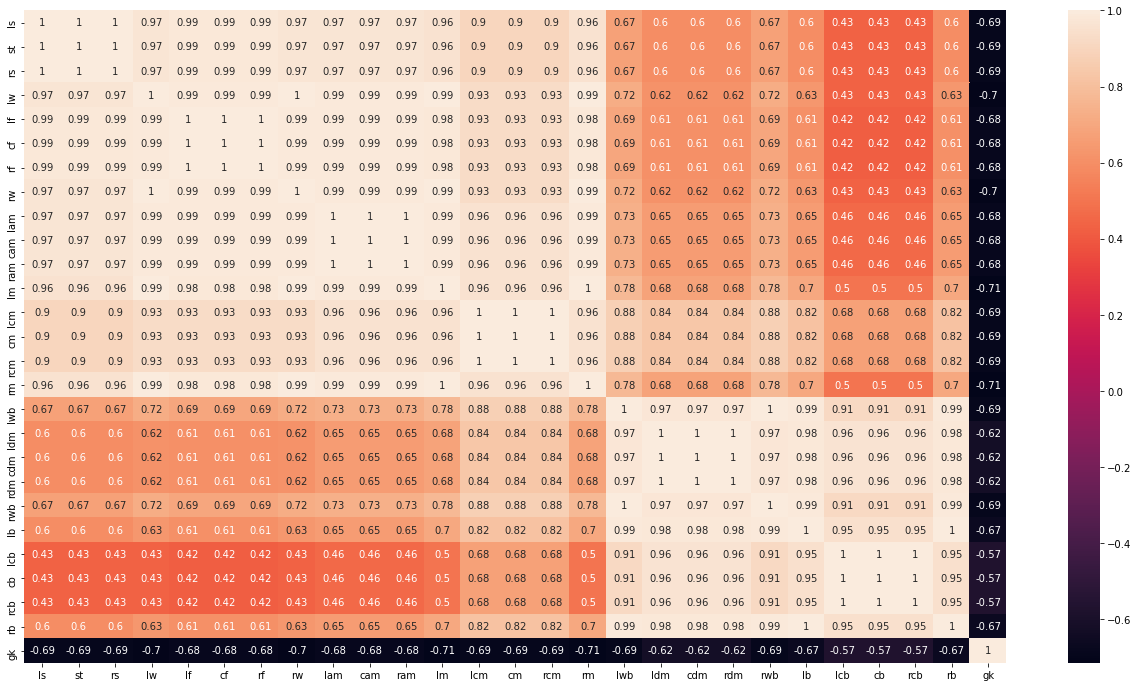

In [55]:
correlations_matrix = data_temp.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(22, 12))
ax = sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
### @TA we have a strong correlation between the Positions above, but how to read the Heatmap
# concat the data_temp wit the dataFrame 'data'
# now get rid of the Stars

In [ ]:
# now get rid of the Stars

In [ ]:
data['w/f']=data['w/f'].apply(clean_star)

In [ ]:
data['sm']=data['sm'].apply(clean_star)

In [ ]:
data['ir']=data['ir'].apply(clean_star)

In [ ]:
data.head(1)

In [ ]:
sns.boxplot(x= data['a/w'], y = data['ova'])
plt.show()
sns.boxplot(x= data['d/w'], y = data['ova'])
plt.show()
sns.boxplot(x= data['sm'], y = data['ova'])
plt.show()
sns.boxplot(x= data['w/f'], y = data['ova'])
plt.show()
sns.boxplot(x= data['ir'], y = data['ova'])
plt.show()


In [ ]:
# Manage Outliners with IQR

In [ ]:
for val in data:
    sns.distplot(data[val])
    plt.show()

In [ ]:
#looking for outliers in numerical data
for val in data.columns:
    sns.boxplot(data[val])
    plt.show()

In [ ]:
# next using the iqr on each colum we decide to
iqr = np.percentile(data['attacking'],75) - np.percentile(data['attacking'],25)
upper_limit = np.percentile(data['attacking'],75) + 1.5*iqr
lower_limit = np.percentile(data['attacking'],25) - 1.5*iqr
data = data[(data['attacking']>lower_limit) & (data['attacking']<upper_limit)]

In [ ]:
#Normalization
## drop the target out of data, define the the target Y (or should we do it before IQR)
Y = data['OVA']
data = data.drop(['OVA'], axis=1)

In [ ]:
# Normalization für alle numerischen x = data
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
#print(x_normalized.shape)

In [ ]:
## Normalization für alle numerischen x = data
# X_num = data.select_dtypes(include = np.number)

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
pd.DataFrame(x_normalized)

In [ ]:
# log transformation, maybe boxcox ... try 

In [ ]:
#Splitting into train set and test set

In [ ]:
# working with X and Y
# X = data
# X = np.concatenate((x_normalized, encoded), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

In [ ]:
#Apply Model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
predictions  = model.predict(X_test)

In [ ]:
#Model Validation

In [ ]:
#R2
r2 = r2_score(y_test, predictions)
print(r2)

In [ ]:
#MSE
mse = mean_squared_error(y_test, predictions)
print(mse)

In [ ]:
#RMSE
rmse = math.sqrt(mse)
print(rmse)